In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy.io

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


In [2]:
def sigmoid(x):
    
    s = 1/(1+np.exp(-x))
    return s

def relu(x):
    
    s = np.maximum(0,x)
    
    return s

#he 随机初始化 
def initialize_parameters_he(layers_dims):
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)

    for l in range(1, L):
       
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*np.sqrt(2./layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        
    return parameters

def compute_cost(a3, Y):
    m = Y.shape[1]
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    cost = 1./m * np.nansum(logprobs)
    return cost


def load_2D_dataset():
    data = scipy.io.loadmat('datasets/data.mat')
    train_X = data['X'].T
    train_Y = data['y'].T
    test_X = data['Xval'].T
    test_Y = data['yval'].T

    plt.scatter(train_X[0, :], train_X[1, :], c=train_Y[0], s=40, cmap=plt.cm.Spectral);
    return train_X, train_Y, test_X, test_Y
#三层神经网络
def forward_propagation(X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache
#反向传播
def backward_propagation(X, Y, cache):
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

def update_parameters(parameters, grads, learning_rate):
    
    n = len(parameters) // 2 

    for k in range(n):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
        
    return parameters

def predict(X, y, parameters):
    
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    
    a3, caches = forward_propagation(X, parameters)
    
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    
    return p



def predict_dec(parameters, X):
    
    a3, cache = forward_propagation(X, parameters)
    predictions = (a3>0.5)
    return predictions

def load_planar_dataset(randomness, seed):
    
    np.random.seed(seed)
    
    m = 50
    N = int(m/2)
    D = 2 
    X = np.zeros((m,D))
    Y = np.zeros((m,1), dtype='uint8') 
    a = 2 

    for j in range(2):
        
        ix = range(N*j,N*(j+1))
        if j == 0:
            t = np.linspace(j, 4*3.1415*(j+1),N) 
            r = 0.3*np.square(t) + np.random.randn(N)*randomness 
        if j == 1:
            t = np.linspace(j, 2*3.1415*(j+1),N) 
            r = 0.2*np.square(t) + np.random.randn(N)*randomness 
            
        X[ix] = np.c_[r*np.cos(t), r*np.sin(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y



问题陈述：您刚刚被法国足球公司聘为AI专家。他们希望你推荐法国队的守门员应该踢球的位置，以便法国队的球员可以用他们的头球击球。
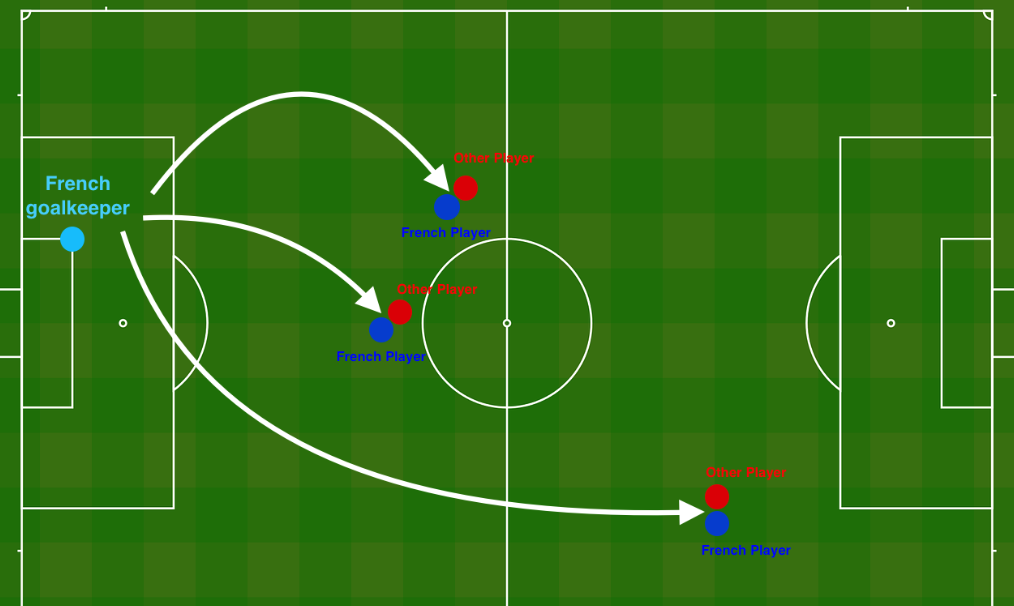

                                  守门员将球踢到空中，每支球队的球员都在用头撞击球
                        
 他们为您提供了法国过去10场比赛的以下2D数据集。

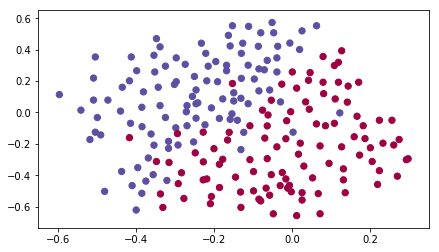

In [3]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()


每个点对应足球场上的一个位置，在法国守门员从足球场地左侧射门后，足球运动员用头部击球。
-如果圆点是蓝色的，表示法国球员成功地用头部击球
-如果圆点是红色的，表示对方球员用头部击球

你的目标:使用一个深度学习模型来找到场上守门员应该踢球的位置。

数据集分析:这个数据集有点小噪音，但是它看起来像一条对角线，将左上半部(蓝色)和右下半部(红色)分隔开。

您将首先尝试一个非正则化模型。然后您将学习如何将其规范化，并决定您将选择哪种模型来解决法国足球队的问题。

### 1 -非正则化模型

您将使用下面的神经网络(已经在下面实现)。该模型可用于:
-在正则化模式下-通过将lambd输入设置为非零值。我们使用“lambd”而不是“lambda”，因为“lambda”是Python中的一个保留关键字。
-在退出模式-通过设置keep_prob的值小于1

首先，您将尝试不进行任何正则化的模型。然后，您将实现:
- L2正则化-函数:“compute_cost_with_regulalization()”和“backward_propagation _with_regulalization()”
函数:" forward_propagation_with_dropout() "和" backward_propagation_with_dropout() "

在每个部分中，您将使用正确的输入运行这个模型，以便它调用您已经实现的函数。查看下面的代码，熟悉模型。

In [4]:
def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
    

    grads = {}
    costs = []                           
    m = X.shape[1]                       
    layers_dims = [X.shape[0], 20, 3, 1]

    #初始化参数
    parameters = initialize_parameters_he(layers_dims)

    for i in range(0, num_iterations):

        # 前向传播: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)

        # 成本函数
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)

        
        assert(lambd==0 or keep_prob==1)   
            # 反向传播.                               
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)

        # 更新参数
        parameters = update_parameters(parameters, grads, learning_rate)

        # 打印
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)

    # 绘制成本曲线
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters


Cost after iteration 0: 0.6060964880245826
Cost after iteration 10000: 0.16152624778469837
Cost after iteration 20000: 0.1430166619458691


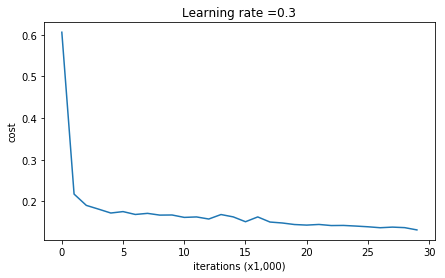

On the training set:
Accuracy: 0.943127962085308
On the test set:
Accuracy: 0.94


In [5]:
parameters = model(train_X, train_Y)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


In [6]:
def plot_decision_boundary(model, X, y):
    
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y[0], cmap=plt.cm.Spectral)
    plt.show()

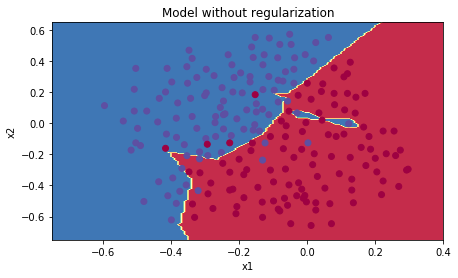

In [7]:
#绘制决策边界
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)


非正则化模型显然过渡拟合了训练集，现在让我们看看两种减少过渡拟合的技术。

### 2 - L2正则化
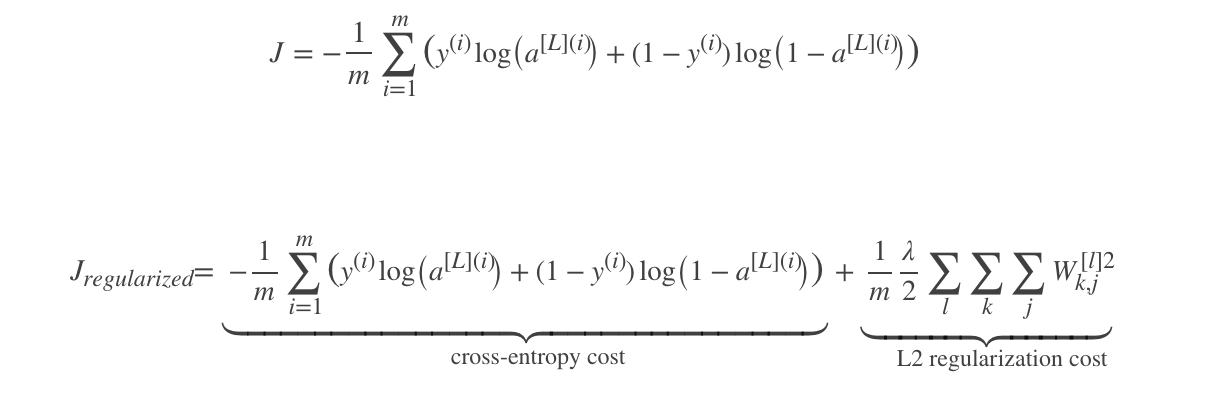

In [8]:
def compute_cost_with_regularization(A3, Y, parameters, lambd):
    
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]

    cross_entropy_cost = compute_cost(A3, Y) 

    #L2范数正则化也被称为 权重衰减 
    L2_regularization_cost = (1./m*lambd/2)*(np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))
    
    cost = cross_entropy_cost + L2_regularization_cost

    return cost


In [9]:
#加了正则化的反向传播
def backward_propagation_with_regularization(X, Y, cache, lambd):
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T) + lambd/m * W3
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T) + lambd/m * W2
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T) + lambd/m * W1
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}

    return gradients


Cost after iteration 0: 0.6895108819546352
Cost after iteration 10000: 0.26507533388008864
Cost after iteration 20000: 0.2649092814689828


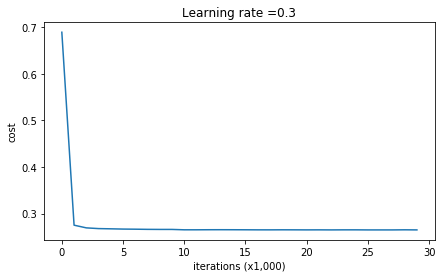

On the train set:
Accuracy: 0.933649289099526
On the test set:
Accuracy: 0.925


In [10]:
parameters = model(train_X, train_Y, lambd = 0.7)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


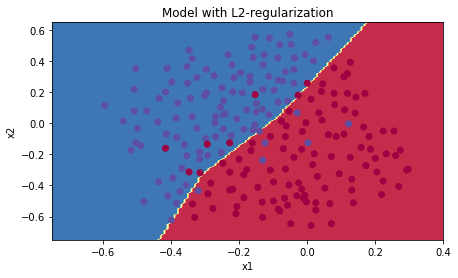

In [11]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)


lambd 是一个l2的超参数，他使你的决策边界很平滑，如果lambd值过大 也可能过渡平滑

*L2 正则化对一下因素的影响：*

- 成本计算：将正则化项添加到了成本中
- 反向传播函数： 在权重矩阵的梯度中有额外的项 ，权重最终变小，

### 3 - dropout 正则化(Dropout Regularization)

它在每次迭代中随机关闭一些神经元


In [15]:
def forward_propagation_with_dropout(X, parameters, keep_prob = 0.5):
    
    np.random.seed(1)

    # 参数
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    #初始化随机矩阵 矩阵的维度和节点的维度相同   
    D1 = np.random.rand(A1.shape[0],A1.shape[1]) 
    #转换成0或1(布尔类型)
    D1 = D1 < keep_prob  
    #关闭一些非true的节点
    A1 = A1 * D1 
    #测量未关闭节点的价值
    A1 = A1 / keep_prob                                     
    #第二层
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    #同样四步
    D2 = np.random.rand(A2.shape[0],A2.shape[1])                                         
    D2 = D2 < keep_prob                                         
    A2 = A2 * D2                                         
    A2 = A2 / keep_prob  
    #第三层输出
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)

    return A3, cache


In [16]:
#带dropout正则的反向传播
def backward_propagation_with_dropout(X, Y, cache, keep_prob):
    
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    #正常求导
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    dA2 = np.dot(W3.T, dZ3)
    
    dA2 = dA2 * D2              
    dA2 = dA2 / keep_prob          
    
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)

    dA1 = np.dot(W2.T, dZ2)
    
    dA1 = dA1 * D1             
    dA1 = dA1 / keep_prob             
    
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}

    return gradients


Cost after iteration 0: 0.6090414098966078


/Users/qiyong/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/Users/qiyong/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


Cost after iteration 10000: 0.05828854157905035
Cost after iteration 20000: 0.05741841337622227


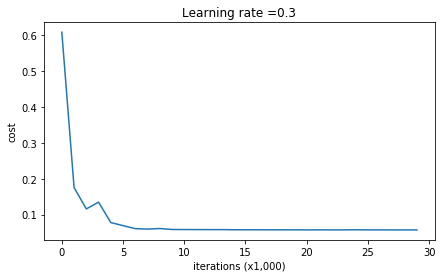

On the train set:
Accuracy: 0.943127962085308
On the test set:
Accuracy: 0.93


In [17]:
parameters = model(train_X, train_Y, keep_prob = 0.86, learning_rate = 0.3)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


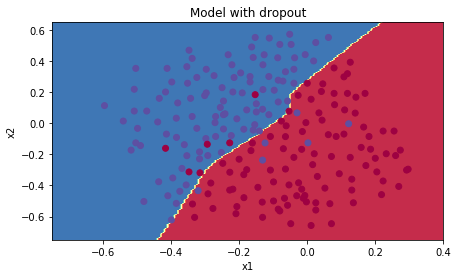

In [18]:

plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)


dropout 效果很好的提升了我们的精度，并且不会再度过渡拟合
*关于dropout 应该注意：*
- 只在训练的时候使用dropout，在测试的时候不要使用
- 在旋律期间keep_prob划分每个丢失层，以保持激活的预期值相同，例如，如果keep_prob为0.5，那么我们平均会关闭一半节点，因此输出将缩放0.5，因为只有剩下的一半对解决方案有贡献。除以0.5相当于乘以2，因此输出现在具有相同的期望值。即使keep_prob的值不是0.5，您也可以检查这是否有效

